In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')
submission = pd.read_csv('../data/sample_submission.csv')

print('train set shape:', train.shape)
print('test set shape:', test.shape)
print('store set shape:', store.shape)

train set shape: (1017209, 9)
test set shape: (41088, 8)
store set shape: (1115, 10)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [6]:
store.isna().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [7]:
# train=train[train['Open']==1]

In [8]:
# test=test[test['Open']==1]

In [9]:
def dateExplode(df,column):
    try:
        df['Year'] = pd.DatetimeIndex(df[column]).year
        df['Month'] = pd.DatetimeIndex(df[column]).month
        df['Day'] = pd.DatetimeIndex(df[column]).day  
    except KeyError:
        print("Column couldn't be found")
        return
    return df  

In [10]:
train_dates=dateExplode(train,"Date")
train_dates.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [11]:
test_dates=dateExplode(test,"Date")
test_dates.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9,17


In [12]:

def bar_plot(df1,df2,name1,name2,column):
    fig, axs = plt.subplots(1,2,figsize=(20,5))
    fig.suptitle(f'{column} Column Distribution')
    sns.countplot(x=column, data=df1,ax=axs[0]).set_title(f'{name1} Set')
    
    sns.countplot(x=column, data=df2,ax=axs[1]).set_title(f'{name2} Set')

Check for seasonality in both training and test sets - are the seasons similar between these two groups?


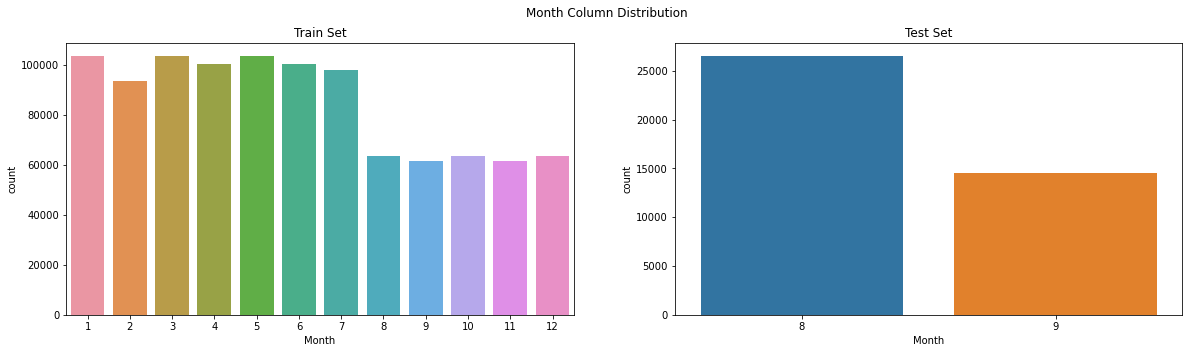

In [13]:
bar_plot(train_dates,test_dates,"Train","Test","Month")

Find out any seasonal (Christmas, Easter etc) purchase behaviours,

In [14]:
# import statsmodels.api as sm

# plt.rcParams["figure.figsize"] = (20,10)
# train_copy=train.copy()

# train_copy=train_copy.groupby('Date')['Sales'].mean()

# decomposition = sm.tsa.seasonal_decompose(train_copy, model='additive',period=1)
# fig = decomposition.plot()
# plt.show()

In [15]:
train["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [16]:
train.loc[train["StateHoliday"]==0,"StateHoliday"]="0"

In [17]:
train["StateHoliday"].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [18]:
train["SchoolHoliday"].unique()

array([1, 0], dtype=int64)

In [19]:
# train_copy=train.copy()
# g = sns.lmplot(x="Sales", y="Date", hue="StateHoliday",
#                truncate=True, size=10, data=train)
               

# # plt.xticks(rotation='vertical')
# plt.title(' Comparing Car Make prices over the years')

In [20]:
def drawLinePlot(df1,group,column,title):

    axis = df1.groupby(group)[[column]].mean().plot(figsize = (12,5),color = 'r' , marker = 'o')
    axis.set_title(f'Average {column} per {group}')
    plt.figure()    

In [21]:
# axis = train.groupby('Date')[['Sales']].mean().plot(figsize = (12,20),color = 'r' , marker = 'o')
# axis.set_title('Average sales per month')
# plt.figure()

What can you say about the correlation between sales and number of customers?

Text(0.5, 1.0, 'Sales - Customers Relation')

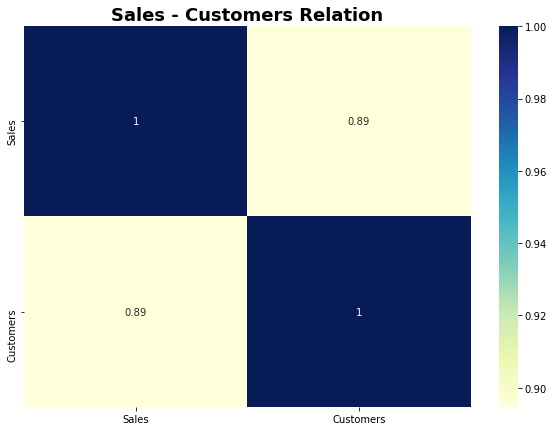

In [22]:

plt.figure(figsize=(10, 7))
sns.heatmap(train[['Sales','Customers']].corr(method='pearson'),annot=True,  cmap="YlGnBu")
plt.title('Sales - Customers Relation', size=18, fontweight='bold')

Text(0.5, 1.0, 'Sales - Promotion Relation')

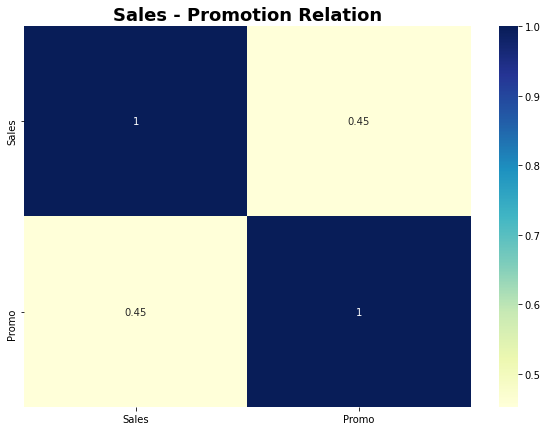

In [23]:

plt.figure(figsize=(10, 7))
sns.heatmap(train[['Sales','Promo']].corr(method='pearson'),annot=True,  cmap="YlGnBu")
plt.title('Sales - Promotion Relation', size=18, fontweight='bold')

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


<AxesSubplot:xlabel='Promo', ylabel='Sales'>

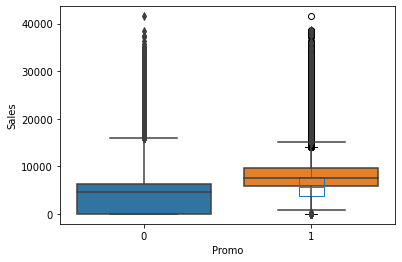

In [24]:
train[["Sales","Promo"]].plot(kind='box')

sns.boxplot(x='Promo', y='Sales', data=train)

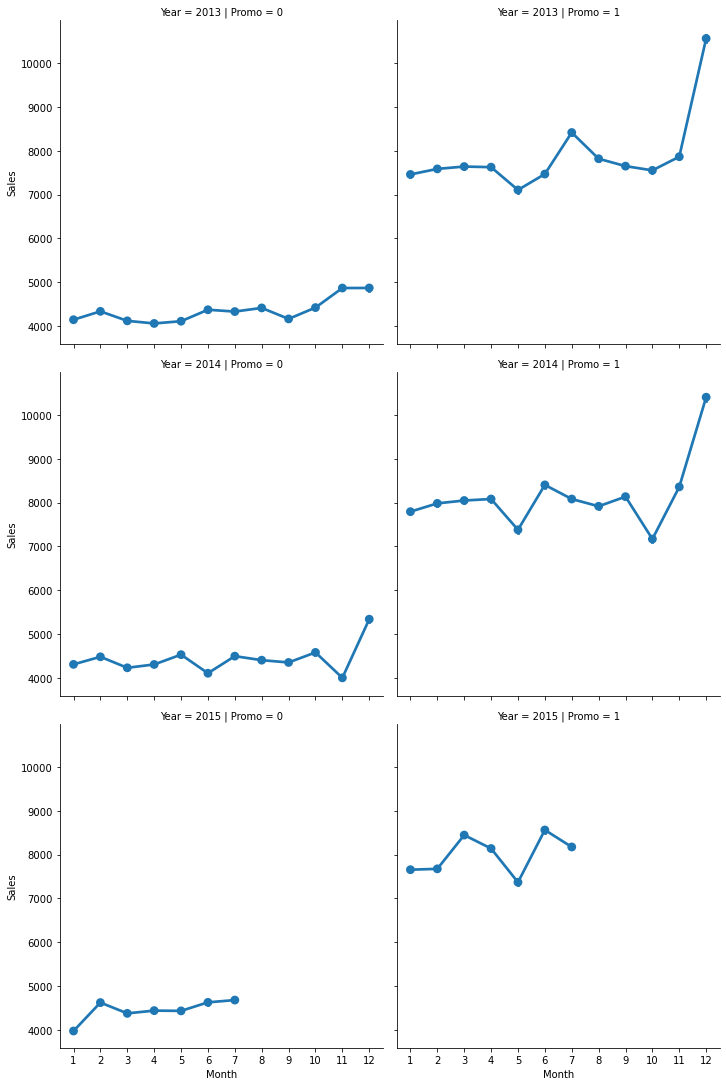

In [25]:
sns.factorplot(data = train, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               row = "Year")

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

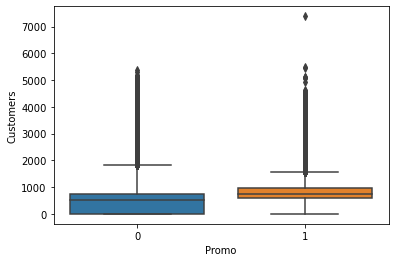

In [26]:
sns.boxplot(x='Promo', y='Customers', data=train)

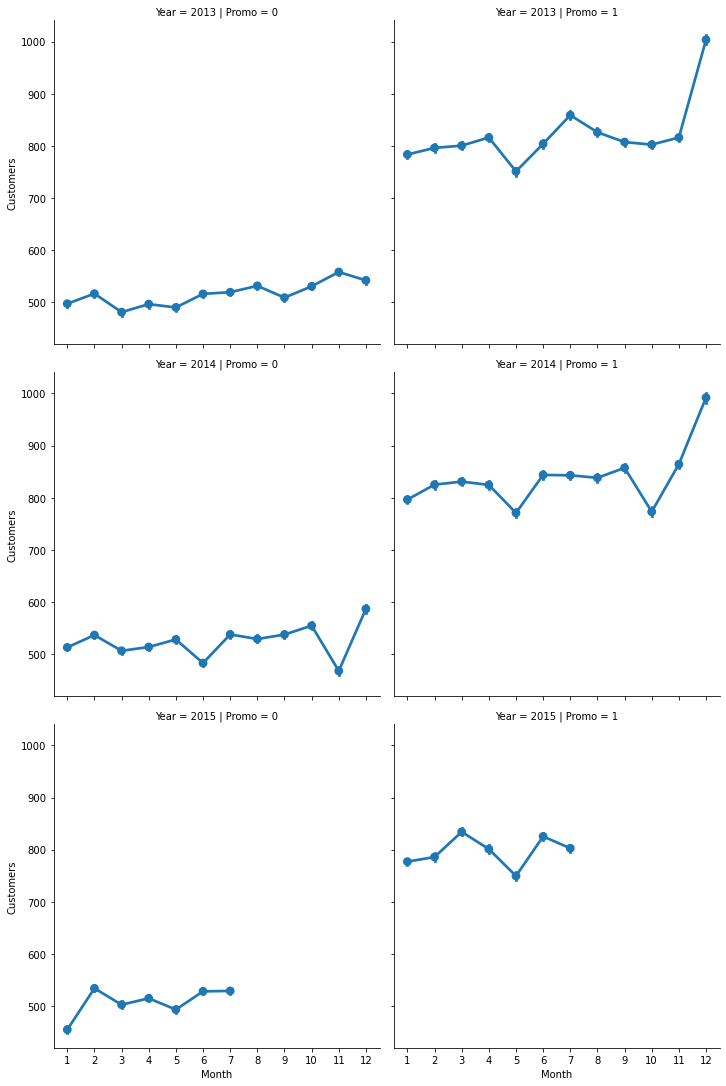

In [27]:
sns.factorplot(data = train, x ="Month", y = "Customers", 
               col = 'Promo', # per store type in cols
               row = "Year")

In [28]:
train[train["Open"]==0].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
count,172817.000000,172817.000000,172817.0,172817.0,172817.0,172817.000000,172817.000000,172817.000000,172817.000000,172817.000000
mean,558.462987,6.333769,0.0,0.0,0.0,0.064716,0.105684,2013.834027,5.851768,15.053467
std,322.771734,1.547688,0.0,0.0,0.0,0.246025,0.307434,0.778058,3.336661,9.252490
min,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,279.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000,2013.000000,3.000000,7.000000
50%,560.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000,2014.000000,5.000000,15.000000
75%,839.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,0.0,0.0,0.0,1.000000,1.000000,2015.000000,12.000000,31.000000


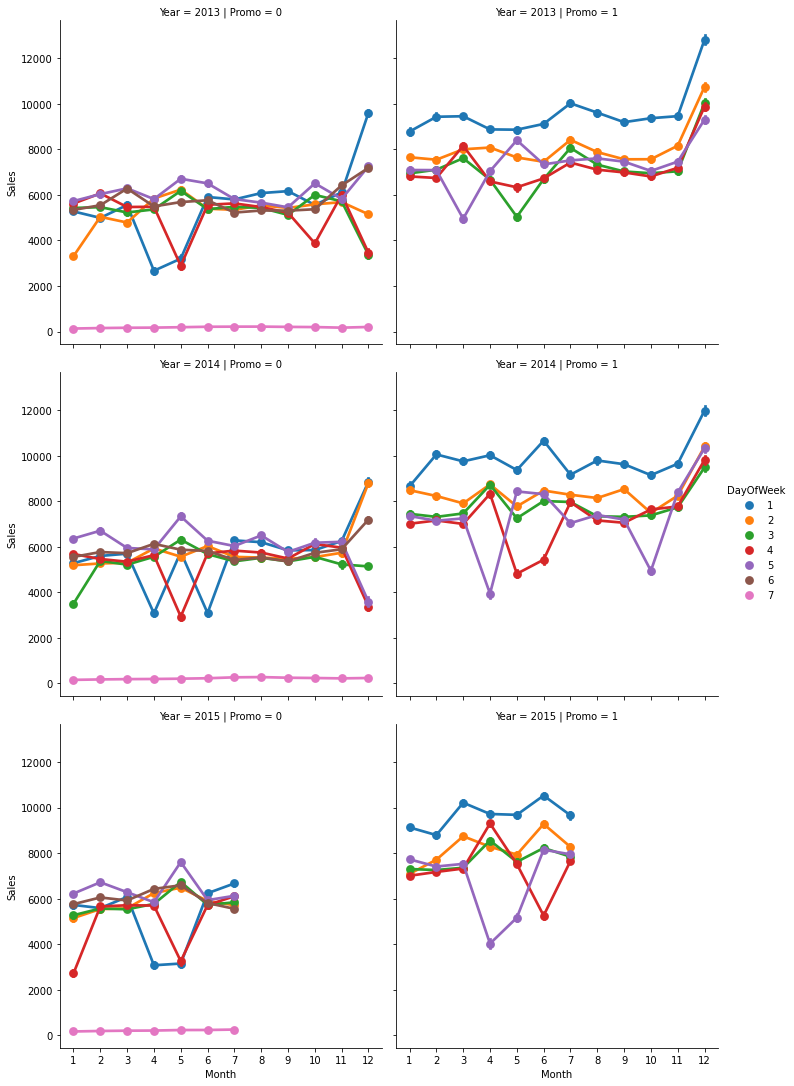

In [29]:
sns.factorplot(data = train, x = 'Month', y = "Sales", estimator=np.mean,
               hue = 'DayOfWeek',
               col = 'Promo',
               row="Year",
            #    col_order=['a', 'b', 'c', '0']
               ) 

In [30]:
day_sales=train.groupby(["DayOfWeek","Open"], as_index=False)

In [31]:
day_sales

In [32]:
# sns.lineplot(data=day_sales,x=day_sales.DayOfWeek,y=day_sales.Sales,hue=day_sales.Open)

<Figure size 432x288 with 0 Axes>

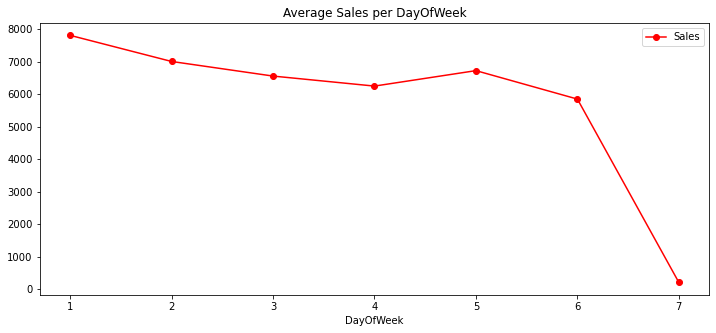

<Figure size 432x288 with 0 Axes>

In [33]:

axis = train.groupby(["DayOfWeek"])[["Sales"]].mean().plot(figsize = (12,5),color = 'r' , marker = 'o')
axis.set_title('Average Sales per DayOfWeek')
plt.figure()    

Text(0.5, 1.0, 'Day Of Week Open Count')

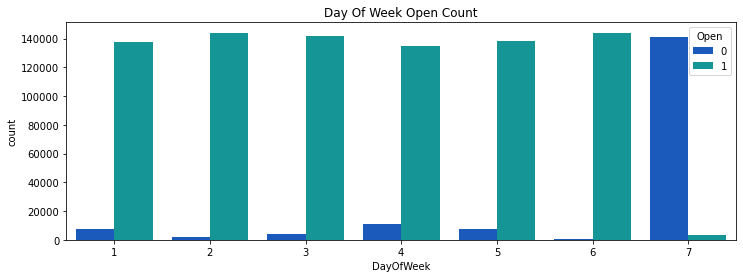

In [34]:
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
sns.countplot(x='DayOfWeek',hue='Open', data=train, ax=axis1, palette = 'winter')
plt.title("Day Of Week Open Count")

<AxesSubplot:xlabel='StateHoliday'>

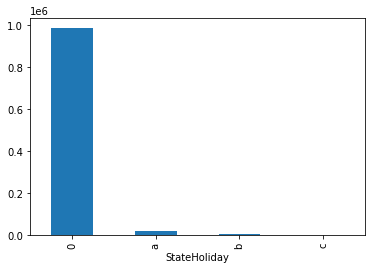

In [35]:
train.groupby("StateHoliday")["Open"].count().plot.bar()

<AxesSubplot:xlabel='SchoolHoliday'>

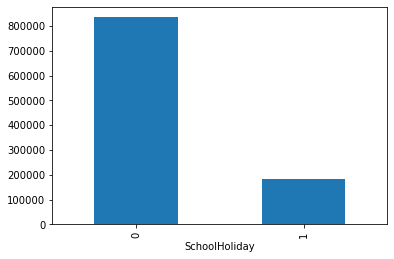

In [36]:
train.groupby("SchoolHoliday")["Open"].count().plot.bar()

In [37]:
dates=train[train["StateHoliday"]!="0"]["Date"].unique()

In [44]:
christmass=train[train["StateHoliday"]=="c"]["Date"].unique()

In [45]:
christmass=pd.to_datetime(christmass)

In [60]:
train_date=train.copy()
train_date["Date"]=pd.to_datetime(train_date["Date"])
averages=train_date.sort_values("Date").groupby('Date')[['Sales','Customers']].mean()

s1 = pd.concat([averages.loc[date - pd.Timedelta(1, unit='d') : 
                      date + pd.Timedelta(30, unit='d')] for date in christmass])

s2 = pd.concat([averages.loc[date - pd.Timedelta(30, unit='d') : 
                      date - pd.Timedelta(1, unit='d') ] for date in christmass])
s3=pd.concat([averages.loc[[date]] for date in christmass])
s1["Status"]="After"
s2["Status"]="Before"
s3["Status"]="During"

<AxesSubplot:xlabel='Status', ylabel='Sales'>

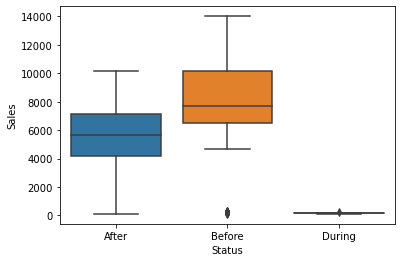

In [61]:
christmass_data=pd.concat([s1,s2,s3])
sns.boxplot(x='Status', y='Sales', data=christmass_data)

<AxesSubplot:xlabel='Status', ylabel='Customers'>

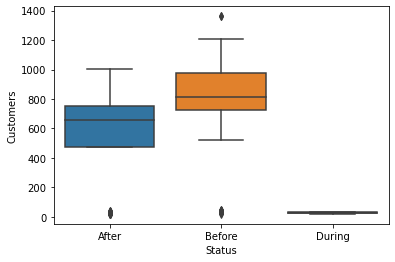

In [62]:

sns.boxplot(x='Status', y='Customers', data=christmass_data)

In [64]:
easter=train[train["StateHoliday"]=="b"]["Date"].unique()

In [65]:
easter=pd.to_datetime(easter)

In [70]:
s1 = pd.concat([averages.loc[date : 
                      date + pd.Timedelta(30, unit='d')] for date in easter])

s2 = pd.concat([averages.loc[date -pd.Timedelta(30, unit='d') : 
                      date ] for date in easter])

s3=pd.concat([averages.loc[[date]] for date in easter])


In [71]:
s1["Status"]="After"
s2["Status"]="Before"
s3["Status"]="During"

<AxesSubplot:xlabel='Status', ylabel='Sales'>

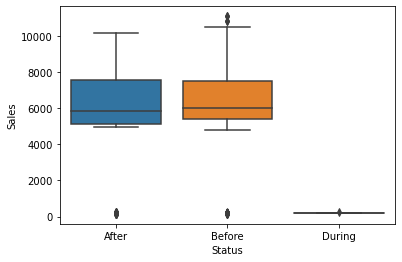

In [72]:
easter_data=pd.concat([s1,s2,s3])
sns.boxplot(x='Status', y='Sales', data=easter_data)

<Figure size 432x288 with 0 Axes>

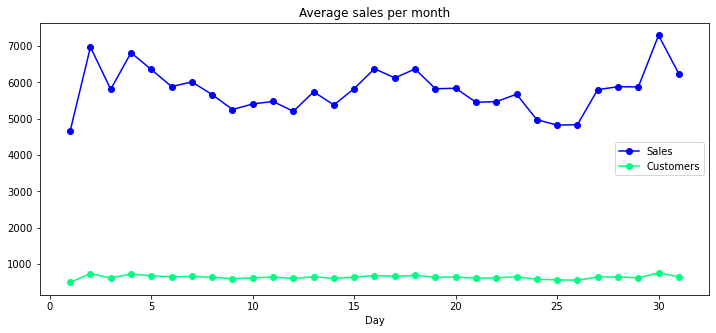

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = train.groupby('Day')[['Sales','Customers']].mean().plot(figsize = (12,5),cmap="winter", marker = 'o')
axis.set_title('Average sales per month')
plt.figure()